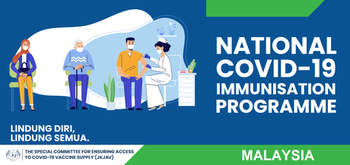

#**INTRODUCTION**

This analysis aims to explore the global landscape of COVID-19 vaccinations and examining their distribution. Recognizing the crucial role vaccinations play in establishing herd immunity and mitigating the spread of the coronavirus, this study seeks to understand the progress made in various countries, with specific focus in Malaysia. Indirectly, this analysis uncovers insight into the effectiveness of vaccination campaigns and their implications for public health and economic well-being.

#**PROBLEM STATEMENT**

This analysis investigates the multifaceted factors influencing the distribution and effectiveness of COVID-19 vaccination campaigns in Malaysia. By examining these factors, this study aims to understand their implications for achieving herd immunity and fostering economic recovery. Moreover, this analysis will explore key challenges and opportunities associated with vaccine rollout and uptake, with a particular focus on Malaysia's experience within the broader global context.

# **CORONAVIRUS DISEASE - THE PANDEMIC**

In 2020, the world faced an unprecedented crisis with the emergence of the COVID-19 pandemic. This novel coronavirus, SARS-CoV-2, rapidly spread across the globe, causing widespread illness and significant mortality. The highly infectious nature of the virus led to overwhelmed healthcare systems, economic disruptions, and social restrictions. Governments and public health organizations implemented various measures to mitigate the pandemic's impact, including lockdowns, travel restrictions, and social distancing guidelines. However, the most effective tool in combating the virus and reducing its severity has been vaccination. Vaccination programs worldwide have played a critical role in preventing infections, hospitalizations, and deaths, paving the way for a gradual return to normalcy.

## **Dataset**

The datasets used in this analysis was obtained from  [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations), specifically from the repository maintained by Our World in Data. For several years, the team from Our World in Data has published crucial daily updates and developed two comprehensive global datasets on COVID-19 testing and vaccinations. Their COVID-19 Data Explorer became an essential resource for understanding the pandemic's scope and impact. Visit their website [Our World in Data](https://ourworldindata.org/coronavirus) for further information.

The data is on Global Vaccination Data, which comprises of 2 datasets ;
*   vaccinations.csv
*   locations.csv

**Vaccination metadata**

Stored in vaccinations.csv, Country-by-country data on global COVID-19 vaccinations. It only rely on figures that are verifiable based on public official sources.

This dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, Northern Cyprus…) and international aggregates (World, continents, European Union…). They can be identified by their iso_code that starts with OWID_.

The population estimates used to calculate per-capita metrics are based on the last revision of the United Nations World Population Prospects.

* **location**: name of the country (or region within a country).

* **iso_code:** ISO 3166-1 alpha-3 – three-letter country codes.

* **date:** date of the observation.

* **total_vaccinations:** total number of doses administered. For vaccines that require multiple doses, each individual dose is counted. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again. If they receive a third/booster dose, it goes up by 1 again.

* **total_vaccinations_per_hundred:** total_vaccinations per 100 people in the total population of the country.

* **daily_vaccinations_raw:** daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead.

* **daily_vaccinations:** new doses administered per day (7-day smoothed). For countries that don't report data on a daily basis, it is assumed that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. An example of how we perform this calculation can be found here.

* **daily_vaccinations_per_million:** daily_vaccinations per 1,000,000 people in the total population of the country.

* **people_vaccinated:** total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. If they receive the second dose, the metric stays the same.
people_vaccinated_per_hundred: people_vaccinated per 100 people in the total population of the country.

* **people_fully_vaccinated:** total number of people who received all doses prescribed by the initial vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.

* **people_fully_vaccinated_per_hundred:** people_fully_vaccinated per 100 people in the total population of the country.

* **total_boosters:** total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the initial vaccination protocol)

* **total_boosters_per_hundred:** total_boosters per 100 people in the total population of the country.

* **daily_people_vaccinated:** daily number of people receiving a first COVID-19 vaccine dose (7-day smoothed).

* **daily_people_vaccinated_per_hundred:** daily_people_vaccinated per 100 people in the total population of the country.

Note: for people_vaccinated and people_fully_vaccinated  are dependent on the necessary data being made available, so may not be avialable to make these metrics available for some countries.

**Country metadata**

Stored in locations.csv

* **location:** name of the country (or region within a country).

* **iso_code:** ISO 3166-1 alpha-3 – three-letter country codes.

* **vaccines:** list of vaccines administered in the country up to the current date.

* **last_observation_date:** date of the last observation in our data.

* **source_name:** name of our source for data collection.

* **source_website:** web location of our source. It can be a standard URL if numbers are consistently reported on a given page; otherwise it will be the source for the last data point.

## **Data Inspection**

In [1]:
# Load library
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
vaccinations = pd.read_csv('/content/drive/MyDrive/data_sc/vaccinations.csv')
vaccinations

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196241,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
196242,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,NaN,NaN,NaN,105.0,563.0,0.003
196243,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,94.0,462.0,0.003
196244,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,82.0,361.0,0.002


In [4]:
# Inspect missing value
vaccinations.isna().sum()

,0
location,0
iso_code,0
date,0
total_vaccinations,110829
people_vaccinated,115114
people_fully_vaccinated,118185
total_boosters,142646
daily_vaccinations_raw,125275
daily_vaccinations,1217
total_vaccinations_per_hundred,110829


In [5]:
# Load data location
location = pd.read_csv('/content/drive/MyDrive/data_sc/locations.csv')
location

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2023-09-10,World Health Organization,https://data.who.int/dashboards/covid19/
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-09-04,World Health Organization,https://data.who.int/dashboards/covid19/
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2023-09-24,World Health Organization,https://data.who.int/dashboards/covid19/
4,Angola,AGO,Oxford/AstraZeneca,2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
...,...,...,...,...,...,...
218,Wales,OWID_WLS,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2023-06-30,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
219,Wallis and Futuna,WLF,Moderna,2023-01-23,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
220,Yemen,YEM,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-10,World Health Organization,https://data.who.int/dashboards/covid19/
221,Zambia,ZMB,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",2023-06-25,Government of Zambia,https://data.who.int/dashboards/covid19/


In [6]:
# Inspect missing value
location.isna().sum()

,0
location,0
iso_code,0
vaccines,0
last_observation_date,0
source_name,0
source_website,0


In [7]:
# Merge both data frame using location as key
vax_merge = pd.merge(vaccinations, location, on='location')
vax_merge

,location,iso_code_x,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,iso_code_y,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,...,NaN,NaN,33.0,1367.0,0.003,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,...,NaN,NaN,33.0,1367.0,0.003,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,...,NaN,NaN,33.0,1367.0,0.003,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,...,NaN,NaN,33.0,1367.0,0.003,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-12-31,World Health Organization,https://data.who.int/dashboards/covid19/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180974,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,...,29.11,6.33,127.0,638.0,0.004,ZWE,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-10-09,Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
180975,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,...,NaN,NaN,105.0,563.0,0.003,ZWE,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-10-09,Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
180976,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,...,NaN,NaN,94.0,462.0,0.003,ZWE,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-10-09,Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
180977,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,...,NaN,NaN,82.0,361.0,0.002,ZWE,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-10-09,Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [8]:
# Find country names for futher analysis
country_names = vaccinations['location'].unique()
country_names

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

**Metadata**

**['location'] in vaccinations** : includes some subnational locations (England, Northern Ireland, Scotland, Wales, Northern Cyprus…) and international aggregates (World, continents, European Union…). They can be identified by their iso_code that starts with OWID_.

While a merged dataset is available, this analysis primarily focuses on Malaysia for simplicity. Therefore, the original 'vaccinations' dataset is used, filtering for data specific to Malaysia. To complement this analysis, the original 'location' dataset will be utilized to provide further insights into vaccines available in various countries.

# **ANALYSIS ON MALAYSIA**

## **Data Cleaning**

### **Data Cleaning on Malaysia vaccination dataset**

In [9]:
# Extract row containing Malaysia from vaccinations dataset
Malaysia = vaccinations.loc[(vaccinations['location'] == 'Malaysia')]
Malaysia

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
108900,Malaysia,MYS,2021-02-24,69.0,66.0,3.0,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN
108901,Malaysia,MYS,2021-02-25,1221.0,1216.0,5.0,NaN,1152.0,1152.0,0.00,0.00,0.00,NaN,34.0,1150.0,0.003
108902,Malaysia,MYS,2021-02-26,5337.0,5329.0,8.0,NaN,4116.0,2634.0,0.02,0.02,0.00,NaN,78.0,2632.0,0.008
108903,Malaysia,MYS,2021-02-27,12063.0,12049.0,14.0,NaN,6726.0,3998.0,0.04,0.04,0.00,NaN,118.0,3994.0,0.012
108904,Malaysia,MYS,2021-02-28,18789.0,18769.0,20.0,NaN,6726.0,4680.0,0.06,0.06,0.00,NaN,138.0,4676.0,0.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110163,Malaysia,MYS,2024-08-10,72657256.0,28138564.0,27551140.0,17185802.0,3.0,15.0,214.09,82.91,81.18,50.64,0.0,2.0,0.000
110164,Malaysia,MYS,2024-08-11,72657259.0,28138564.0,27551143.0,17185802.0,3.0,14.0,214.09,82.91,81.18,50.64,0.0,2.0,0.000
110165,Malaysia,MYS,2024-08-12,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,0.0,2.0,0.000
110166,Malaysia,MYS,2024-08-13,72657274.0,28138565.0,27551143.0,17185816.0,NaN,11.0,214.09,82.91,81.18,50.64,0.0,1.0,0.000


In [10]:
# Inspect missing value
Malaysia.isna().sum()

,0
location,0
iso_code,0
date,0
total_vaccinations,11
people_vaccinated,32
people_fully_vaccinated,11
total_boosters,200
daily_vaccinations_raw,19
daily_vaccinations,1
total_vaccinations_per_hundred,11


This analysis focuses on key COVID-19 vaccination metrics in Malaysia, including total vaccinations, people fully vaccinated, total boosters, and daily vaccinations. By examining these indicators, we aim to understand the progress and effectiveness of the national vaccination program and its impact on public health outcomes. To achieve this, we will create a new dataset containing only these key metrics, removing extraneous columns from the original dataset.


In [11]:
# Drop extraneous column
Msia = Malaysia.drop(['location', 'iso_code','people_vaccinated', 'daily_vaccinations_raw',
                      'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                      'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                      'total_boosters_per_hundred','daily_vaccinations_per_million',
                      'daily_people_vaccinated','daily_people_vaccinated_per_hundred'], axis=1)
Msia

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,NaN,NaN
108901,2021-02-25,1221.0,5.0,NaN,1152.0
108902,2021-02-26,5337.0,8.0,NaN,2634.0
108903,2021-02-27,12063.0,14.0,NaN,3998.0
108904,2021-02-28,18789.0,20.0,NaN,4680.0
...,...,...,...,...,...
110163,2024-08-10,72657256.0,27551140.0,17185802.0,15.0
110164,2024-08-11,72657259.0,27551143.0,17185802.0,14.0
110165,2024-08-12,NaN,NaN,NaN,12.0
110166,2024-08-13,72657274.0,27551143.0,17185816.0,11.0


**Metadata**

**total_vaccinations**: total number of doses administered. For vaccines that require multiple doses, each individual dose is counted. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again. If they receive a third/booster dose, it goes up by 1 again.

**people_fully_vaccinated**: total number of people who received all doses prescribed by the initial vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.


Given that total_vaccinations and people_fully_vaccinated represent a cumulative sum of daily vaccinations, forward-filling any missing values with the preceding valid value is a suitable imputation strategy. This approach preserves the cumulative nature of the data and minimizes the risk of introducing artificial fluctuations or distorting the analysis, as it assumes that the total vaccination count remains unchanged on days with missing data, reflecting a likely scenario in the absence of new vaccinations being administered.

In [12]:
# Fill the missing value in total_vaccinations
Msia[['total_vaccinations','people_fully_vaccinated']] = Msia[['total_vaccinations','people_fully_vaccinated']].ffill()
Msia

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,NaN,NaN
108901,2021-02-25,1221.0,5.0,NaN,1152.0
108902,2021-02-26,5337.0,8.0,NaN,2634.0
108903,2021-02-27,12063.0,14.0,NaN,3998.0
108904,2021-02-28,18789.0,20.0,NaN,4680.0
...,...,...,...,...,...
110163,2024-08-10,72657256.0,27551140.0,17185802.0,15.0
110164,2024-08-11,72657259.0,27551143.0,17185802.0,14.0
110165,2024-08-12,72657259.0,27551143.0,NaN,12.0
110166,2024-08-13,72657274.0,27551143.0,17185816.0,11.0


**Metadata**

**daily_vaccinations**: new doses administered per day (7-day smoothed). For countries that do not report data on a daily basis, it is assumed that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. Below is an example of the calculation;

5 people take part in a vaccination program, to be given a vaccine that requires 2 doses to be effective against the disease.

Rebecca has received 2 doses, then a 3rd (booster) dose;
Thomas has received 2 doses;
James has received 1 dose;
Lauren has not received any dose.

In our data:
* The total number of doses administered (total_vaccinations) will be equal to 6 (3 + 2 + 1);
* The total number of people vaccinated (people_vaccinated) will be equal to 3 Rebecca, James, Thomas);
* The total number of people with a complete initial protocol (people_fully_vaccinated) will be equal to 2 (Rebecca, Thomas);
* The total number of boosters administered (total_boosters) will be equal to 1 (Rebecca)

In [13]:
# Inspect row for missing value in daily_vaccinations
Msia.loc[Msia['daily_vaccinations'].isna()]

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,NaN,NaN


In [14]:
# Inspect rows 3 rows prior and after the row with missing value in daily_vaccinations
Msia.loc[108897:108903]

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,NaN,NaN
108901,2021-02-25,1221.0,5.0,NaN,1152.0
108902,2021-02-26,5337.0,8.0,NaN,2634.0
108903,2021-02-27,12063.0,14.0,NaN,3998.0


In [15]:
# Fill in the missing value with 0 for daily_vaccinations
Msia.fillna({'daily_vaccinations':0}, inplace=True)
Msia

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,NaN,0.0
108901,2021-02-25,1221.0,5.0,NaN,1152.0
108902,2021-02-26,5337.0,8.0,NaN,2634.0
108903,2021-02-27,12063.0,14.0,NaN,3998.0
108904,2021-02-28,18789.0,20.0,NaN,4680.0
...,...,...,...,...,...
110163,2024-08-10,72657256.0,27551140.0,17185802.0,15.0
110164,2024-08-11,72657259.0,27551143.0,17185802.0,14.0
110165,2024-08-12,72657259.0,27551143.0,NaN,12.0
110166,2024-08-13,72657274.0,27551143.0,17185816.0,11.0


The Msia dataset, extracted from the global vaccinations dataset, begins with index number 108900, indicating that the above rows in the original dataset are not included. As the first row of Msia contains missing values in the daily_vaccinations column and given that the column likely represents cumulative or daily figures, it is reasonable to impute these missing value with 0.

This imputation is consistent with the likely scenario that the vaccination program had just commenced at this point and no daily vaccinations had yet been reported.

**Metadata**

**total_boosters:** total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the initial vaccination protocol)


In [16]:
# Mask rows where daily_vaccinations is not NaN
valid_data_mask = Msia['total_boosters'].notna()
# Get index of the first valid row
first_valid_index = Msia[valid_data_mask].index.min()

In [17]:
# Replace the missing value before the first observation with 0
Msia.loc[:first_valid_index - 1, 'total_boosters'] = 0
Msia

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,0.0,0.0
108901,2021-02-25,1221.0,5.0,0.0,1152.0
108902,2021-02-26,5337.0,8.0,0.0,2634.0
108903,2021-02-27,12063.0,14.0,0.0,3998.0
108904,2021-02-28,18789.0,20.0,0.0,4680.0
...,...,...,...,...,...
110163,2024-08-10,72657256.0,27551140.0,17185802.0,15.0
110164,2024-08-11,72657259.0,27551143.0,17185802.0,14.0
110165,2024-08-12,72657259.0,27551143.0,NaN,12.0
110166,2024-08-13,72657274.0,27551143.0,17185816.0,11.0


In [18]:
# Forward-fill the missing value in cumulative pattern
Msia['total_boosters'] = Msia['total_boosters'].ffill()
Msia

,date,total_vaccinations,people_fully_vaccinated,total_boosters,daily_vaccinations
108900,2021-02-24,69.0,3.0,0.0,0.0
108901,2021-02-25,1221.0,5.0,0.0,1152.0
108902,2021-02-26,5337.0,8.0,0.0,2634.0
108903,2021-02-27,12063.0,14.0,0.0,3998.0
108904,2021-02-28,18789.0,20.0,0.0,4680.0
...,...,...,...,...,...
110163,2024-08-10,72657256.0,27551140.0,17185802.0,15.0
110164,2024-08-11,72657259.0,27551143.0,17185802.0,14.0
110165,2024-08-12,72657259.0,27551143.0,17185802.0,12.0
110166,2024-08-13,72657274.0,27551143.0,17185816.0,11.0


Considering that the booster dose rollout in Malaysia commenced on October 31, 2021, the initial missing values in the 'total_boosters' column likely represent the period before booster administration began or data collection for boosters was implemented. This inference is supported by the observation that the first non-null entry in the column coincides with the known start date of the booster program. Given the cumulative nature of the 'total_boosters' data, employing a forward-fill imputation strategy for these missing values is appropriate, as it maintains the data's inherent cumulative pattern without introducing distortions.

In [19]:
# Check for missing value.
Msia.isna().sum()

,0
date,0
total_vaccinations,0
people_fully_vaccinated,0
total_boosters,0
daily_vaccinations,0


In [20]:
# Convert date column to Datetime
Msia.loc[:, 'date'] = pd.to_datetime(Msia['date'])

Through a meticulous data cleaning process involving data selection, imputation of missing values for key vaccination metrics like total_vaccinations, people_fully_vaccinated, daily_vaccinations, and total_boosters, and conversion of the date column to Datetime, the dataset has been prepared and is now deemed ready for comprehensive analysis, enabling the exploration of patterns, trends, and insights related to COVID-19 vaccinations in Malaysia.

### **Data Cleaning on vaccines dataset**

To facilitate a focused analysis on vaccine distribution, extraneous columns such as iso_code, last_observation_date, source_name, and source_website are removed from the location dataset, retaining only information pertinent to the vaccines administered in various countries.

In [21]:
# Drop unwanted column
vaccines = location.drop(['iso_code','last_observation_date','source_name','source_website'],axis=1)
vaccines

,location,vaccines
0,Afghanistan,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox..."
1,Albania,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
2,Algeria,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
3,Andorra,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Angola,Oxford/AstraZeneca
...,...,...
218,Wales,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
219,Wallis and Futuna,Moderna
220,Yemen,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox..."
221,Zambia,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm..."


**Metadata**

**location:** name of the country (or region within a country).

**vaccines:** list of vaccines administered in the country up to the current date

The vaccine data in the 'vaccines' column will be transformed by splitting the comma-separated values into individual rows, enabling analysis of vaccine distribution patterns. To facilitate this analysis, vaccines with a frequency lower than 5 will be grouped into an 'other' category

In [22]:
# Split the text
vaccines['vaccines'] = vaccines['vaccines'].str.split(', ')

# Convert list to multiple rows
vax= vaccines.explode('vaccines')
vax

,location,vaccines
0,Afghanistan,CanSino
0,Afghanistan,Covaxin
0,Afghanistan,Johnson&Johnson
0,Afghanistan,Moderna
0,Afghanistan,Oxford/AstraZeneca
...,...,...
221,Zambia,Sinopharm/Beijing
222,Zimbabwe,Oxford/AstraZeneca
222,Zimbabwe,Sinopharm/Beijing
222,Zimbabwe,Sinovac


In [23]:
# Clean & transform data
vax = vax.drop_duplicates()
vax = vax.reset_index(drop=True)
vax

,location,vaccines
0,Afghanistan,CanSino
1,Afghanistan,Covaxin
2,Afghanistan,Johnson&Johnson
3,Afghanistan,Moderna
4,Afghanistan,Oxford/AstraZeneca
...,...,...
952,Zambia,Sinopharm/Beijing
953,Zimbabwe,Oxford/AstraZeneca
954,Zimbabwe,Sinopharm/Beijing
955,Zimbabwe,Sinovac


In [24]:
# Extract the frequency
vax['vaccines'].value_counts()

,count
vaccines,
Oxford/AstraZeneca,187
Pfizer/BioNTech,166
Moderna,115
Johnson&Johnson,106
Sinopharm/Beijing,96
Sinovac,67
Sputnik V,67
Novavax,33
Covaxin,31


In [25]:
# Group vaccines with count less than 5

# Create a dictionary to store vaccine frequencies
vaccine_counts = {}

# Loop through the 'vaccines' column
for vaccine in vax['vaccines']:
    if vaccine in vaccine_counts:
        vaccine_counts[vaccine] += 1
    else:
        vaccine_counts[vaccine] = 1

# Classify vaccines based on frequency
low_freq_vaccines = []

for vaccine, count in vaccine_counts.items():
    if count < 5:
        low_freq_vaccines.append(vaccine)

print(low_freq_vaccines)

['Sinopharm/Wuhan', 'Sanofi/GSK', 'Valneva', 'KoviVac/Chumakov', 'Medicago', 'IMBCAMS', 'KCONVAC', 'ZF2001', 'Abdala', 'Soberana Plus', 'Soberana02', 'Corbevax', 'COVIran Barekat', 'QazVac', 'EpiVacCorona', 'Medigen', 'Turkovac']


In [26]:
# Replace value low frequency vaccines as Others
for vac in low_freq_vaccines:
   vax['vaccines'] = vax['vaccines'].replace(vac,'Others')
vax_count = vax['vaccines'].value_counts()
vax_count

,count
vaccines,
Oxford/AstraZeneca,187
Pfizer/BioNTech,166
Moderna,115
Johnson&Johnson,106
Sinopharm/Beijing,96
Sinovac,67
Sputnik V,67
Others,33
Novavax,33


In [27]:
# Extract rows for Malaysia
vax_Msia = vax[vax['location'] == 'Malaysia']
vax_Msia

,location,vaccines
523,Malaysia,CanSino
524,Malaysia,Oxford/AstraZeneca
525,Malaysia,Pfizer/BioNTech
526,Malaysia,Sinopharm/Beijing
527,Malaysia,Sinovac


The vaccines dataset has undergone a comprehensive transformation process to prepare it for further analysis. This process involved splitting the comma-separated values in the 'vaccines' column into individual rows, enabling a more granular examination of vaccine distribution patterns. Additionally, to facilitate this analysis and enhance clarity, vaccines with a frequency lower than 5 have been grouped into an 'other' category. The dataset is now well-structured and ready for in-depth exploration to uncover insights into the distribution of various COVID-19 vaccines.

## **Data Analysis**

In [28]:
# Load library for plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
import seaborn as sns

In [29]:
# Load library for timeseries
from datetime import date

### **Data Analysis on Total Vaccinations**

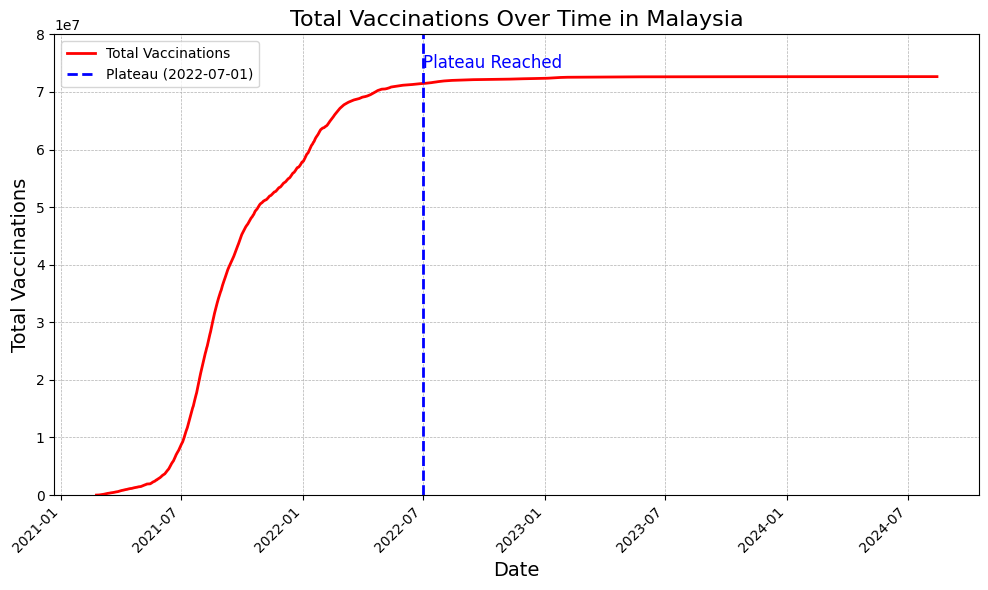

In [30]:
plt.figure(figsize=(10,6))

# Plot the total vaccinations over time
plt.plot(Msia['date'], Msia['total_vaccinations'], color='red', linewidth=2, label='Total Vaccinations')

# Add labels, title and y-scale
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.title('Total Vaccinations Over Time in Malaysia', fontsize=16)
plt.ylim([0, 80000000])

# Gradually slowing down
target_date = pd.to_datetime('2022-07-01')
plt.axvline(x=target_date, color='blue', linestyle='--', linewidth=2, label='Plateau (2022-07-01)')

# Add label to the plateau line
plt.text(target_date, 75000000, 'Plateau Reached', color='blue', fontsize=12, va='center', ha='left')

# Add a grid to the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend to clarify the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

The total_vaccinations column represents the cumulative number of vaccine doses administered in Malaysia, providing insights into the initiation and progress of the national vaccination program. The graph indicates that Malaysia's vaccination program commenced around February 2021 and experienced a significant increase in total vaccinations, before reaching a plateau around July 2022. This suggests an active initial promotion and rollout of the vaccination program, followed by a potential slowdown in uptake or completion of the primary vaccination series for a large portion of the population.[4][13]


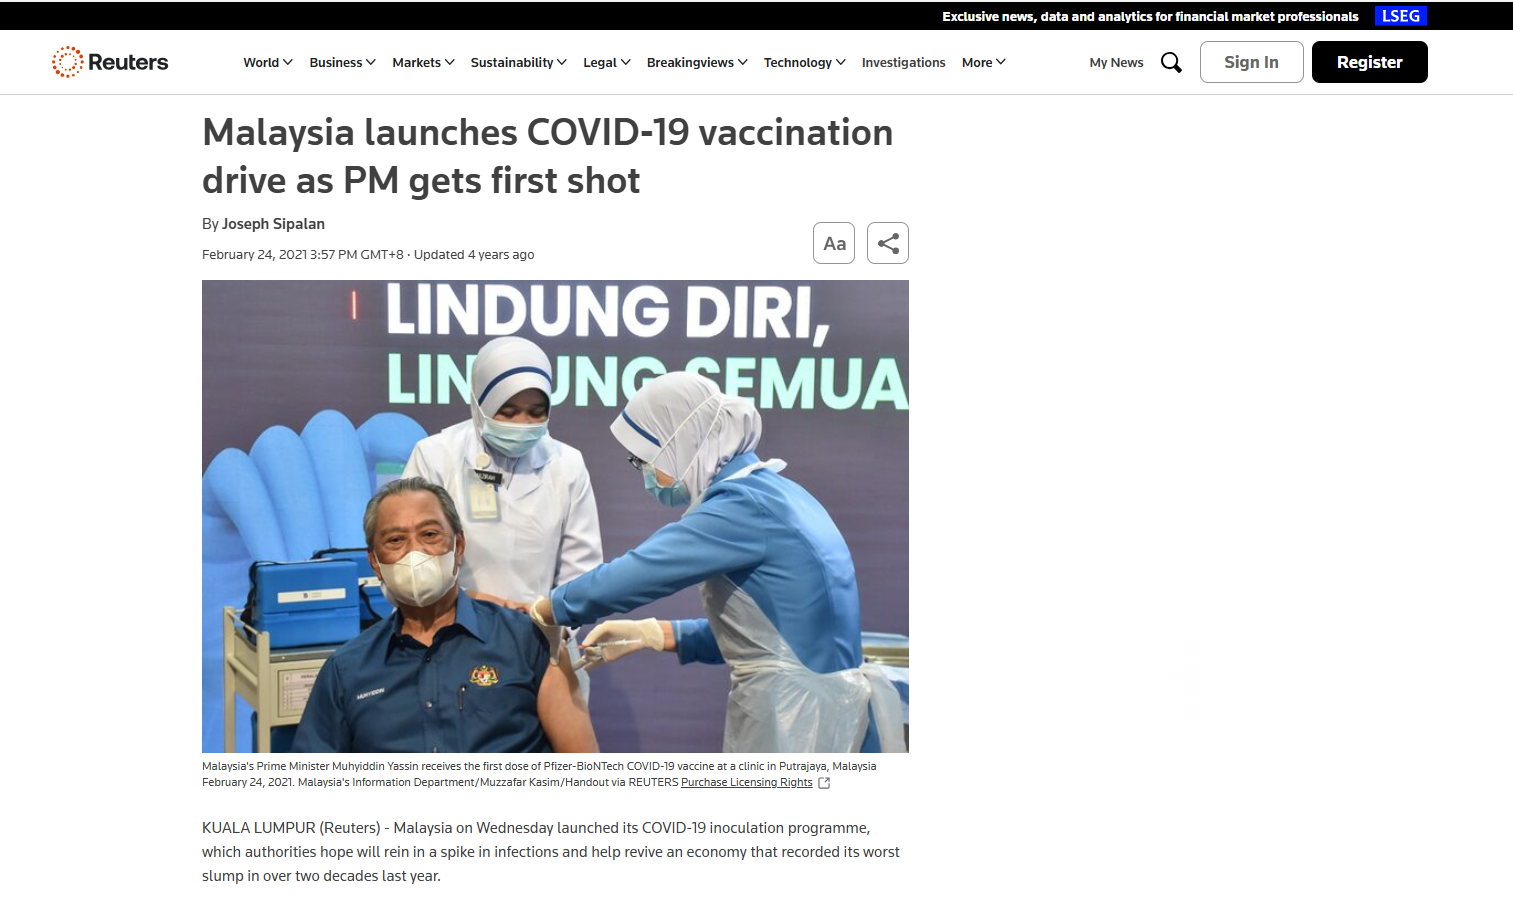

As depicted in the graph above, Malaysia's Covid-19 Vaccination Program commenced with the Prime Minister receiving the first dose on 24th February 2021, signifying the start of a nationwide rollout. The program was meticulously planned and implemented to ensure smooth execution. The Ministry of Health Malaysia (KKM) oversaw the National Covid-19 Immunisation Programme (PICK), outlining steps from vaccine procurement by Ministy of Science, Technology, and Innovation (MOSTI) to establishing vaccination centers. The program primarily employed a two-dose regimen for most vaccines, requiring individuals to receive two doses within a specified interval for optimal protection. [KKMNOW](https://data.moh.gov.my/dashboard/covid-vaccination) provides daily vaccination updates in Malaysia, supplementing the data obtained from Our World in Data.

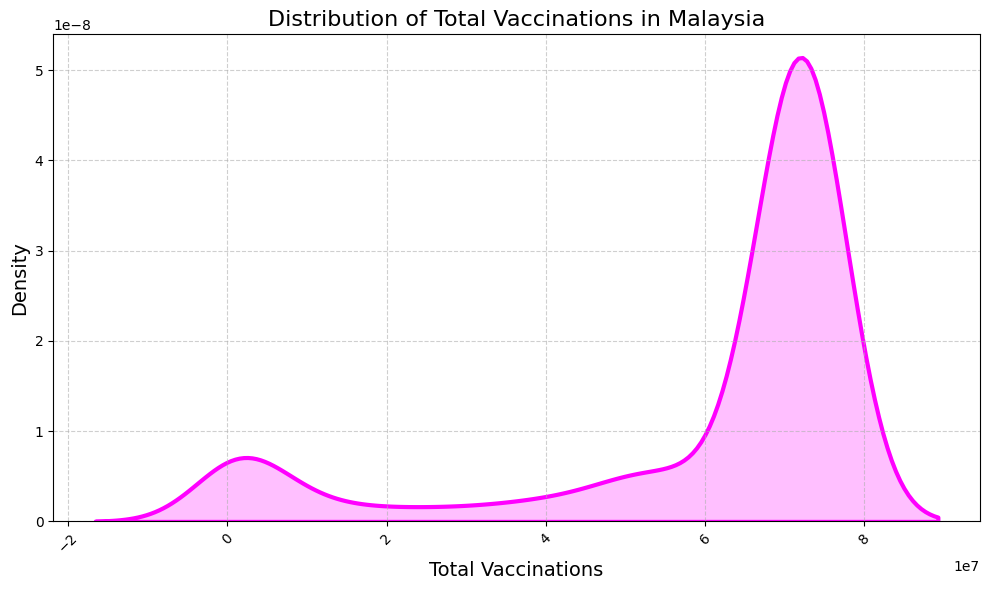

In [31]:
plt.figure(figsize=(10,6))

# Plot the density graph with
sns.kdeplot(Msia['total_vaccinations'],
            color='magenta',
            fill=True,  # Filling the area under the curve
            linewidth=3)  # Thicker line for emphasis

# Title and labels
plt.title('Distribution of Total Vaccinations in Malaysia', fontsize=16)
plt.xlabel('Total Vaccinations', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout();
plt.show()


The graph illustrating total vaccinations over time in Malaysia reveals two distinct peaks, with a plateau occurring after the first peak. The first peak likely represents the initial surge in vaccinations, primarily driven by the first-dose administration to frontline workers and high-risk groups, who were prioritized in the early phase of the immunization campaign.

The plateau that follows indicates that a significant portion of the priority groups had already received their first dose, and the pace of vaccinations began to slow as the campaign moved toward vaccinating the general public. This slowing could also be due to the waiting period required before administering the second dose.

The second peak signifies the mass administration of second doses to those who had already received their first. However, this peak is noticeably higher than the first because it includes not only second doses but also booster doses as part of the extended immunization efforts. As booster programs were introduced to enhance immunity, the total number of vaccinations recorded increased sharply, contributing to the height of the second peak. After this phase, the decline in the graph suggests that most people had completed their two-dose vaccination cycle and booster doses, leading to a slowdown in vaccinations.[7][8]


### **Data Analysis on Daily Vaccinations**

In [32]:
# Convert date column to datetime object
Msia['date'] = pd.to_datetime(Msia['date'])

# check data type
print(Msia['date'].dtype)

# Calculate Offset
first_date_wrong = pd.to_datetime(Msia['date'].iloc[0]).date()
first_date_correct = date(2021, 2, 24)
offset_days = (first_date_wrong - first_date_correct).days

# Apply Offset
Msia['date'] = pd.to_datetime(Msia['date']) - pd.Timedelta(days=offset_days)

# Define start and end dates for color fills
start_date1 = pd.to_datetime('2021-02-24')
booster_date = pd.to_datetime('2021-11-05')
end_date2 = pd.to_datetime('2023-03-20')

# Create masks for date ranges to be filled
mask1 = (Msia['date'] >= start_date1) & (Msia['date'] <= booster_date)
mask2 = (Msia['date'] > booster_date) & (Msia['date'] <= end_date2)

datetime64[ns]


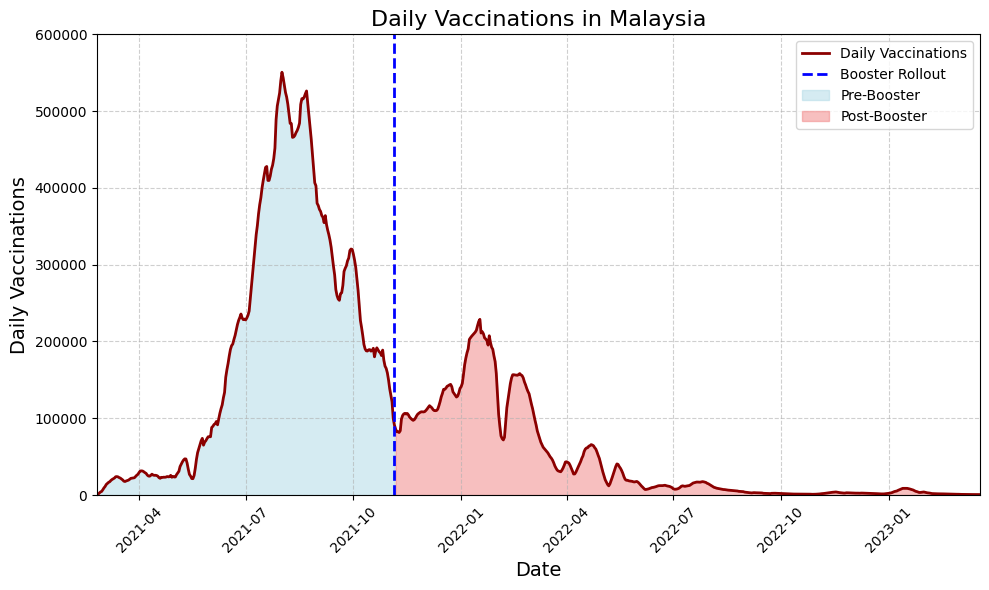

In [33]:
plt.figure(figsize=(10, 6))

# Plot the daily vaccinations graph
plt.plot(Msia['date'], Msia['daily_vaccinations'], color='darkred', linewidth=2, label='Daily Vaccinations')

# Title and labels
plt.title('Daily Vaccinations in Malaysia', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Vaccinations', fontsize=14)

# Set the y-limits and x-limits
plt.ylim([0, 600000])
plt.xlim(start_date1, end_date2)

# Booster rollout line
plt.axvline(x=booster_date, color='blue', linestyle='--', linewidth=2, label='Booster Rollout')

# Apply color fills
plt.fill_between(Msia['date'][mask1], Msia['daily_vaccinations'][mask1], color='lightblue', alpha=0.5, label='Pre-Booster')
plt.fill_between(Msia['date'][mask2], Msia['daily_vaccinations'][mask2], color='lightcoral', alpha=0.5, label='Post-Booster')

# Add grid lines
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# Rotate x-axis labels for better clarity
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The density graph illustrates the trend of daily COVID-19 vaccinations in Malaysia, revealing two distinct phases. The initial phase corresponds to the period of administering the two compulsory vaccine doses. Following the government's initiation of the booster dose program on October 31, 2021, a significant gap emerged between the two peaks in vaccination rates.[4] This disparity likely stems from vaccine hesitancy surrounding the second dose, resulting in a lower peak. Research indicates that such hesitancy can be attributed to concerns about vaccine side effects and negative opinions expressed by close friends and family regarding the vaccine's safety.[9]


### **Data Analysis on Total Boosters**

In [34]:
# Find out maximun value
max_booster = Msia['total_boosters'].max()
max_vaccination = Msia['total_vaccinations'].max()
print(max_booster)
print(max_vaccination)

17185825.0
72657288.0


In [35]:
# Make a dataset for analyis
diff = [max_booster,max_vaccination-max_booster]
diff

[17185825.0, 55471463.0]

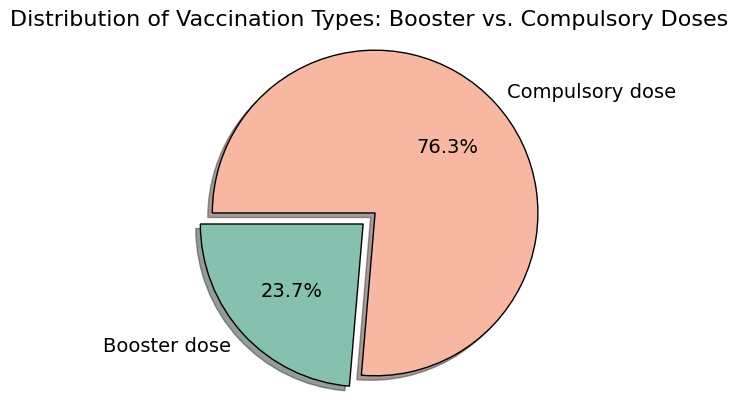

In [36]:
# Define labels for the slices
labels = ['Booster dose', 'Compulsory dose']

# Exploding the first slice (Booster dose) for emphasis
explode = (0.1, 0)

# Create the pie chart
plt.pie(diff, labels=labels, autopct='%1.1f%%', startangle=180, colors=['#85C1AE', '#F7B7A3'],
        explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})

# Add a title
plt.title('Distribution of Vaccination Types: Booster vs. Compulsory Doses', fontsize=16)

# Ensure the circle's proportion is correct (
plt.axis('equal')

# Display the chart
plt.show()


The pie chart visually illustrates the proportion of booster doses relative to the total number of vaccinations administered. With only 23.7% of the total vaccinations consisting of booster doses, this suggests that a significant majority of the population has received their compulsory doses. However, the relatively low proportion of booster doses could indicate several underlying factors. It may reflect vaccine hesitancy or reluctance toward receiving the additional dose, despite its availability. People may be less inclined to take the booster due to concerns about side effects of the vaccines and misinformation by family and friends.[9]

### **Data Analysis on People Fully Vaccinated**

In [37]:
# Total population of Malaysia is 34.1 million
Msia_pop = 34100000
Msia_pop

34100000

In [38]:
# Total people fully vaccinated
max_vax = Msia['people_fully_vaccinated'].max()
max_vax

27551144.0

In [39]:
# Make a series
pop = pd.Series([Msia_pop, max_vax],
                index=['Total Malaysia Population', 'Fully Vaccinated Population'],
                name='Population')
pop

,Population
Total Malaysia Population,34100000.0
Fully Vaccinated Population,27551144.0


In [40]:
# Percentage of fully vaccinated people
cover = round((max_vax/Msia_pop)*100,2)
coverage = ([cover,100-cover])
coverage

[80.8, 19.200000000000003]

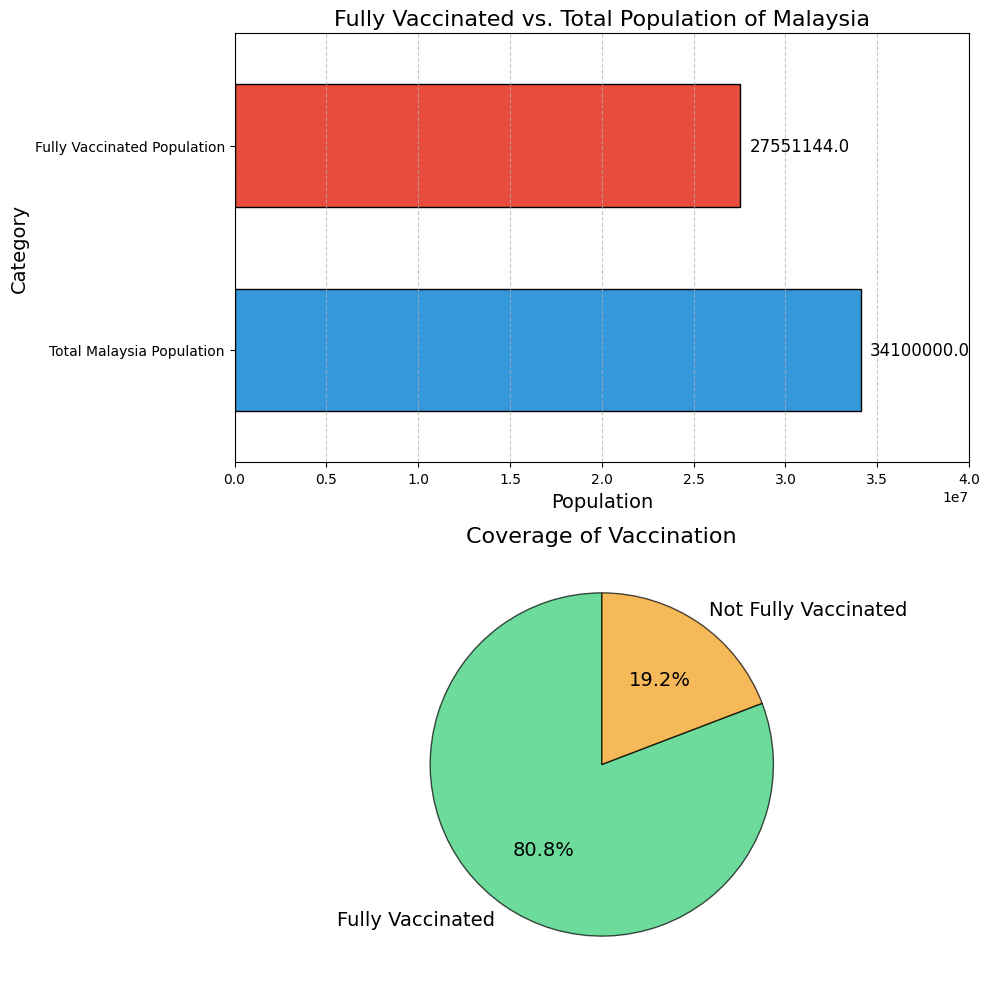

In [41]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # Adjust figure size for better spacing

# Plot horizontal bar graph on the first subplot (axes[0])
pop.plot.barh(ax=axes[0], color=['#3498db', '#e74c3c'], width=0.6, edgecolor='black')  # Improved color scheme
axes[0].set_title('Fully Vaccinated vs. Total Population of Malaysia', fontsize=16)
axes[0].set_xlabel('Population', fontsize=14)
axes[0].set_ylabel('Category', fontsize=14)
axes[0].set_xlim([0, 40000000])
axes[0].grid(True, axis='x', linestyle='--', alpha=0.7)  # Adding gridlines for readability

# Add data labels to the bar plot
for i, value in enumerate(pop):
    axes[0].text(value + 500000, i, str(value), ha='left', va='center', fontsize=12, color='black')

# Plot pie chart on the second subplot (axes[1])
colors = ['#2ecc71', '#f39c12']
axes[1].pie(coverage, labels=['Fully Vaccinated', 'Not Fully Vaccinated'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'alpha': 0.7}, textprops={'fontsize': 14})

# Add title for pie chart
axes[1].set_title('Coverage of Vaccination', fontsize=16)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Data indicate that 80.8% of Malaysia's population, approximately 27.5 million individuals out of a total of 34.1 million, received two doses of a COVID-19 vaccine.[10] This high vaccination coverage can be attributed to several factors, notably the government's proactive initiatives and campaigns through the National COVID-19 Immunization Program (PICK). PICK's success was further bolstered by strong community engagement and support, which fostered public trust and acceptance of the vaccine.[6]


### **Data Analysis on Vaccines**

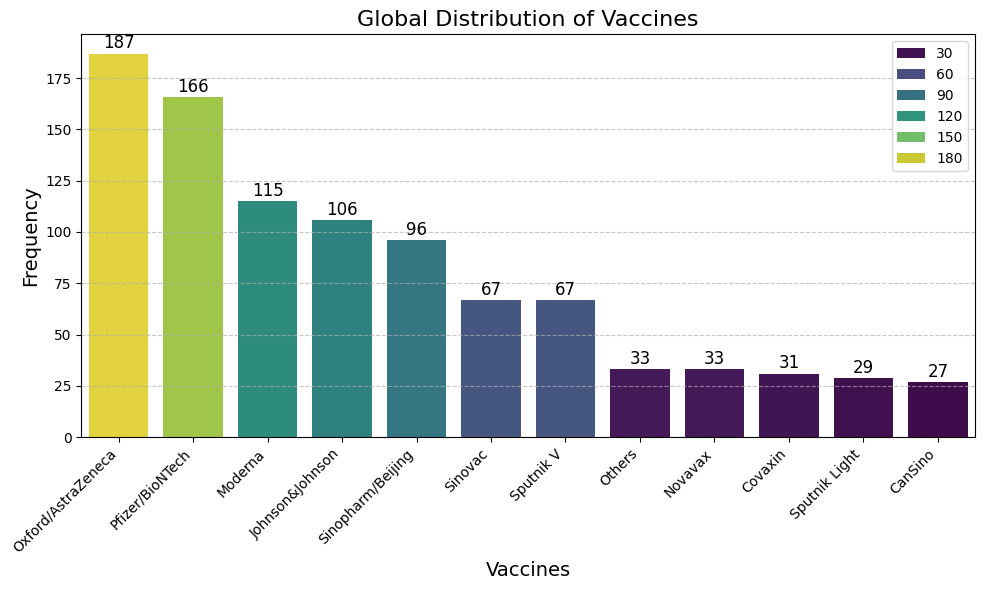

In [42]:
# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=vax_count.index, y=vax_count.values, hue=vax_count.values, palette="viridis")

# Add title and axis labels
plt.title('Global Distribution of Vaccines', fontsize=16)
plt.xlabel('Vaccines', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

# Add gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for index, value in enumerate(vax_count.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout to avoid clipping and improve visual balance
plt.tight_layout()

# Show plot
plt.show()


The graph showcases global vaccine distribution, categorizing vaccines into four tiers based on their administration frequency. AstraZeneca and Pfizer-BioNTech dominate the top tier as the most widely distributed vaccines globally. The second tier includes Moderna, Johnson & Johnson, and Sinopharm, with administration frequencies ranging between 90-120. Sinovac and Sputnik V form the third tier, while the final tier consists of less frequently distributed vaccines, each with frequencies below 30.

In terms of efficacy and safety, Moderna and Pfizer-BioNTech demonstrated the highest effectiveness in preventing symptomatic COVID-19. For severe cases, Sputnik V and Moderna showed the strongest performance. However, the ability to make definitive comparisons between Johnson & Johnson, Sputnik V, and Moderna was limited due to the small number of severe cases reported.[11]

The prominence of AstraZeneca and Pfizer-BioNTech in global distribution reflects their central role in the worldwide vaccination effort, combining widespread availability with high efficacy and strong safety profiles.


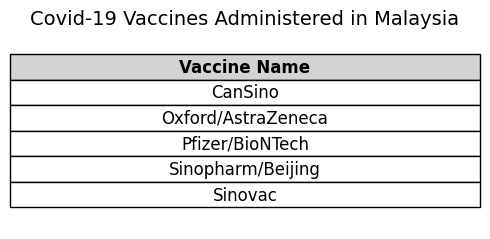

In [43]:
# show table of vaccines administered in Malaysia

# Get unique vaccine names as a list
vaccine_names = vax_Msia['vaccines'].unique().reshape(-1, 1)  # Reshape for table format

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, len(vaccine_names) * 0.5))  # Adjust height based on number of vaccines

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=vaccine_names,
                 colLabels=['Vaccine Name'],
                 loc='center',
                 cellLoc='center',
                 colColours=["lightgray"])  # Adds a background color to the header

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust scaling if needed

# Make the header bold
header_cells = table._cells[(0, 0)]  # Access the header cell
header_cells.set_text_props(weight='bold')  # Set text to bold

# Set a title for the figure
plt.title('Covid-19 Vaccines Administered in Malaysia', fontsize=14)

plt.tight_layout()
plt.show()


The global distribution of COVID-19 vaccines follows a similar hierarchy, with AstraZeneca and Pfizer-BioNTech leading the way in terms of frequency and efficacy. Malaysia, too, has made strategic decisions in its vaccine procurement, securing 66.7 million doses from five manufacturers through the COVAX Facility and direct purchases. Among these, the Pfizer-BioNTech and Moderna vaccines—both mRNA-based—are key players, aligning with their high efficacy globally in preventing symptomatic COVID-19.

In addition to these, Malaysia has also secured vaccines like Sinovac and Sinopharm (inactivated virus vaccines), Oxford-AstraZeneca and Janssen (viral vector vaccines), and CanSinoBio (a single-dose viral vector vaccine). These vaccines, which have received approval from regulatory bodies like the Drug Control Authority (DCA) and the National Pharmaceutical Regulatory Agency (NPRA), reflect a diverse approach to ensuring widespread coverage. Despite varying levels of distribution frequency and efficacy, Malaysia’s vaccination efforts are in line with global trends in securing and distributing effective and safe vaccines to combat the pandemic.[11]


# **National COVID-19 Immunisation Programme (PICK)**

Malaysia’s National COVID-19 Immunisation Programme (PICK) proved highly effective in ensuring widespread vaccine distribution and public engagement. The efficient use of cold chain management and the Vaccine Management System (VMS) facilitated safe and timely vaccine delivery. Public awareness campaigns, including social media outreach and community engagement, successfully addressed vaccine hesitancy and boosted uptake. Healthcare personnel played a key role in managing logistics, monitoring side effects, and offering counseling, which contributed to the smooth execution of the program. Innovative strategies like mobile outreach and Mega Vaccination Centres overcame logistical challenges, ensuring that even remote areas were reached. The program's success highlighted important lessons for future health crises, underscoring the need for improved infrastructure and enhanced community engagement to strengthen pandemic preparedness.[6]


Malaysia's economy recovered well after the pandemic, with GDP 10% higher than before by mid-2023. Key sectors like manufacturing and services grew due to global demand. Employment increased by 2.8% in 2022, supported by wage subsidies and gig work. Tourism rebounded to 70% of pre-pandemic levels, boosting jobs. Exports, especially in electronics, helped trade stability. While some sectors like agriculture and construction struggled, Malaysia's diverse economy and strategic plans are helping it prepare for future growth.[12]


# **CONCLUSION**

In conclusion, this analysis highlights the multifaceted factors that have shaped Malaysia's COVID-19 vaccination campaign, emphasizing both the successes and challenges encountered. The government’s proactive efforts through the National COVID-19 Immunisation Programme (PICK), combined with the strategic procurement of a wide range of vaccines, have been instrumental in achieving high vaccination rates. The data shows a steady increase in vaccinations for compulsory doses, with a plateau occurring around July 2022, indicating that a significant portion of the population had received their primary vaccinations. However, vaccine hesitancy persisted, particularly regarding booster doses, with only 23.7% of those who completed the compulsory doses receiving their booster shot. This reluctance can be attributed to concerns about vaccine side effects and misinformation spread by friends and family. Despite these challenges, the awareness campaigns launched by PICK, which included efforts to combat misinformation and dispel myths surrounding the vaccines, played a critical role in addressing these concerns and boosting public confidence in the vaccination process.

The government’s efforts in procuring vaccines, based on rigorous evaluations of efficacy and safety, should also be acknowledged. Through a careful and transparent selection process, Malaysia ensured that the vaccines administered were of the highest standards, which not only contributed to public trust but also helped mitigate the risk of adverse reactions. These efforts demonstrated the government's commitment to safeguarding public health while making vaccines widely accessible to all segments of the population.

With over 80% of the population now fully vaccinated, Malaysia’s vaccination campaign has been largely successful in meeting its targets. These efforts have been crucial in achieving herd immunity, significantly reducing the risk of severe COVID-19 cases, and positioning Malaysia for a robust economic recovery. The return of social and economic activities, coupled with a safer environment, has contributed to the nation’s resilience in the face of the pandemic. Ultimately, the success of Malaysia's vaccination strategy, underpinned by effective public health policies, transparent communication, and swift action, will continue to support public health and economic growth in the post-pandemic future.

# **REFERENCE**

1. **World Health Organization** *Coronavirus disease (COVID-19)* https://www.who.int/europe/emergencies/situations/covid-19 , https://www.who.int/health-topics/coronavirus#tab=tab_1
2. **Our World in Data** *COVID-19 Pandemic.* https://ourworldindata.org/coronavirus
3. **GitHub** *owid/covid-19-data*. https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations
4. **Reuters** *Malaysia launches COVID-19 vaccination drive as PM gets first shot.* https://www.reuters.com/article/world/malaysia-launches-covid-19-vaccination-drive-as-pm-gets-first-shot-idUSKBN2AO0RF/
5. **KKMNOW** *COVID-19 Vaccination* https://data.moh.gov.my/dashboard/covid-vaccination
6. **Program Perkhidmatan Farmasi, KKM** *Toward COVID-19 Endemic in Malaysia: The Journey Continues.* https://pharmacy.moh.gov.my/sites/default/files/document-upload/pick-report-final-ver.-online.pdf
7. **COVID-19 Malaysia, KKM** *Clinical Guidelines on COVID-19 Vaccination in Malaysia.* https://covid-19.moh.gov.my/garis-panduan/garis-panduan-kkm/ANNEX_48_CLINICAL_GUIDELINES_FOR_COVID_IN_MALAYSIA_4th_EDITION_19102021_FINALE.pdf.
8. **COVID-19 Malaysia, KKM** *Booster Dose* https://covid-19.moh.gov.my/vaksin-covid-19/pick-dos-penggalak
9. **PubMed Central** *COVID-19 Vaccine Booster Hesitancy in Malaysia: A Web-Based Cross-Sectional Study.* https://pmc.ncbi.nlm.nih.gov/articles/PMC10058917/
10. **OpenDOSM** *The Population of Malaysia.* https://open.dosm.gov.my/dashboard/population
11. **Scientific Reports** *Comparing the clinical efficacy of COVID-19 vaccines: a systematic review and network meta-analysis* https://www.nature.com/articles/s41598-021-02321-z
12. **BNM** *Malaysia’s Economic Resilience:A Post-pandemic Analysis* https://www.bnm.gov.my/documents/20124/12521489/qb23q3_en_box1.pdf
13. **MDPI** *COVID-19 Vaccination Prioritization Strategies in Malaysia: A Retrospective Analysis of Early Evidence* https://www.mdpi.com/2076-393X/11/1/48?utm_source